<a href="https://colab.research.google.com/github/DannielM/Machine-Learning/blob/main/Caso_1_da_4intelligence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Data Science* - **4 Intelligence**

## **Caso 1** - Análise Exploratória de Dados de uma Série Temporal

In [1]:
# Ciência de Dados é Vida 
%%html
<marquee style='width: 60%; color: Red;'><b> Então vamos Começar!</b></marquee>

## 1° Importando as Bibliotecas

In [ ]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import requests
import folium
from plotly.offline import iplot
import scipy.stats as st 
from string import ascii_letters
import random
import time
import warnings
import statsmodels.api as sm 

#Informar o matplotlib inline sobre os gráficos
%matplotlib inline

# Importando Algumas Funções
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from collections import Counter
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.stats.stattools import durbin_watson
random.seed(0)
warnings.filterwarnings('ignore')

## 2° Entendendo o Problema a ser Resolvido

Nesse caso prático, nós precisamos fazer um estudo das séries temporais do TFP dos seguintes paises:

- Estados Unidos (*EUA*)

- Canadá

- México 

O estudo consiste em fazermos uma nálise exploratória dos dados, a fim de entendermos os conceitos necessários para realizarmosa manipulaçõe, modelagem e previsões futuras. 


**Fonte de Dados**

Usaremos a base de dados **"TFP.csv"** dsiponibilizado pela 4intelligence para esse estudo.



## 3° Fazendo a Análise Exploratória dos Dados

- Carregadno a nossa base de dados

In [3]:
# Carregando os nossos dados que já se encontram no formato "csv"
dados = pd.read_csv('/content/drive/MyDrive/4intelligence/TFP.csv')


# Mostrando ou Imprimindo na Tela as 5 primeiras linhas
dados.head()

,isocode,year,rtfpna
0,USA,1950,0.617148
1,USA,1951,0.629588
2,USA,1952,0.638451
3,USA,1953,0.651858
4,USA,1954,0.646179


### **Descrição das Variáveis dos nossos Dados**

 - **isocode** → Indica o código de cada País

 - **yera** → Representa os anos

 - **rtfpna** → é a *Produtividade Total dos Fatores a Preços Nacionais Constantes*

 - **USA = EUA** → Símbolo que representa os *Estados Unidos da América*

 - **CAN**  → Símbolo que representa o *Canadá*

 - **MEX** → Símbolo que representa o *México*

### **Obtendo informações dos nossos dados**

In [4]:
# Verificando os tipos de dados usando o comando "INFO"
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   isocode  186 non-null    object 
 1   year     186 non-null    int64  
 2   rtfpna   186 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.5+ KB


In [5]:
# Verificando o tamanho do DataFrame usando o comando "SHAPE"
# Formato do Shape é "(Linhas, Colunas)""
dados.shape

(186, 3)

In [6]:
# Verificando os tipos de dados das Colunas usando o camando "DTYPES"
dados.dtypes

isocode     object
year         int64
rtfpna     float64
dtype: object

In [7]:
# Verificando se temos valores missing ou valores ausentes
dados.isna().sum()

isocode    0
year       0
rtfpna     0
dtype: int64

In [8]:
# Vamos verificar a quantidade de itens que existem no arquivo
dados.count()

isocode    186
year       186
rtfpna     186
dtype: int64

**Nota**: As informações presentes na tabela de dados indicam que não temos valores ausentes(*conhecidos* como **missing**).

### **Reorganizando os dados para uma melhor compressão e análise.**

Observe que os dados estão empilhados, sendo assim, será feito uma organizar de uma forma mais compatível com as séries temporais e com a entrada das funções que serão utilizadas posteriormente. Além disso, os dados são visualmente mais enxutos, sem repetir valores em *iscode* e *ano*.

- Essa organização será feita em uma *Tabela Dinâmica*

In [9]:
# Organizando e atribuindo os valores nos nossos dados.
# Eliminando os índicees padrão e atribuindo a coluna "ano" para os índices.
dados = dados.pivot(index='year', columns='isocode', values='rtfpna')

In [10]:
# Visaulizando os nossos dados completos.
# Onde são mostrados as 5 primeiras linhas e as 5 últimas linhas
dados

isocode,CAN,MEX,USA
year,,,
1950,0.843335,0.798159,0.617148
1951,0.855123,0.860931,0.629588
1952,0.896489,0.876968,0.638451
1953,0.910658,0.855204,0.651858
1954,0.875178,0.929168,0.646179
...,...,...,...
2007,0.981433,1.013673,1.006595
2008,0.958357,0.991548,0.998499
2009,0.926482,0.915879,0.986738


# 4° Visualização dos Dados

- As visualizações das séries temporais serão feitas para observarmos sua disposição em função do tempo. Na visualização, podemos ter os primeiros indícios da série sobre os possíveis problemas.

In [11]:
# Configurando os paramêntros

sns.mpl.rcParams['figure.figsize'] = (11.0, 5.0)
sns.mpl.rcParams['savefig.dpi'] = 80
sns.mpl.rcParams['font.family'] = 'serif'
sns.mpl.rcParams['font.size'] = 15

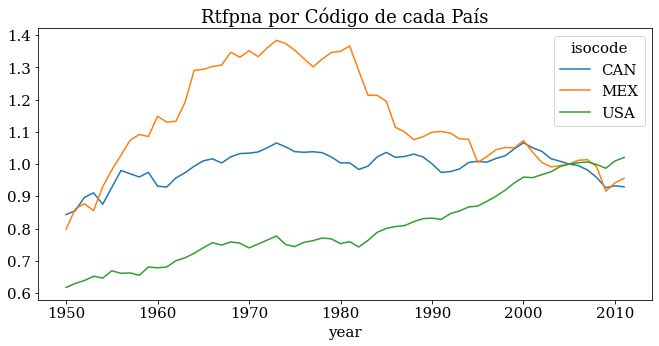

In [12]:
# Apresentando em um gráfico

dados.plot()

plt.title('Rtfpna por Código de cada País')
plt.show()

In [13]:
# Fazendo uma análise Matemática das Colunas numéricas
# Obtendo assim, a "Média, Desvio Padrão, os valores Máximos e Mínimos e as variações percentuais em tornda média"
dados.describe()

isocode,CAN,MEX,USA
count,62.000000,62.000000,62.000000
mean,0.992886,1.130132,0.803824
std,0.050126,0.158209,0.116121
min,0.843335,0.798159,0.617148
25%,0.973294,1.012231,0.739949
50%,1.004211,1.093859,0.766047
75%,1.029513,1.299591,0.880544
max,1.066104,1.383718,1.020392


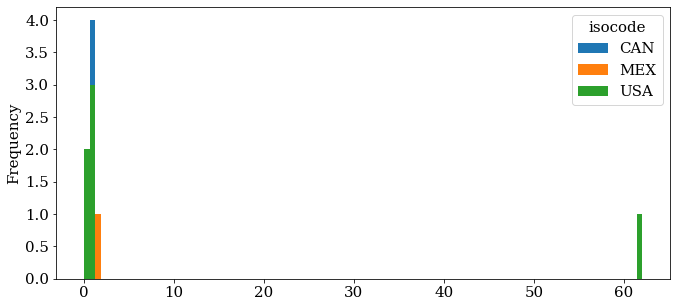

In [14]:
# Colocando esses dados em um Histograma, tem-se:

dados.describe('').plot.hist(bins=100)

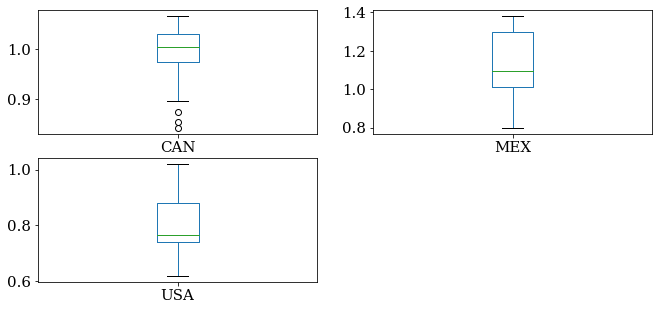

In [15]:
# Cria um gráfico tipo box and whisker plots (o famoso boxplot)
from matplotlib import pyplot
dados.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

**Algumas considerações**:

- Nos gráficos podemos observar que não temos valores dispersos ou os **Outliers** para USA e MEX, porém o Candá apresenta alguns valores dispersos. 

- Os **outliers** são dados que se distanciam radicalmente de todos os outros, isto é, são pontos fora da curva normal, valores que fogem da normalidade e que podem causar desequilíbrio nos resultados obtidos. 

- O efeito de um **outlier** é quase um efeito borboleta, um pequeno erro se propaga e quando não tratado corretamente pode ocasionar problemas e anomalias.

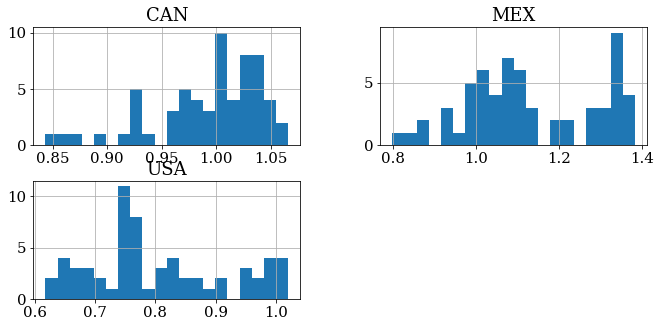

In [16]:
# Criando um gráfico conhecido como histohrama
dados.hist(bins=20)
plt.show()

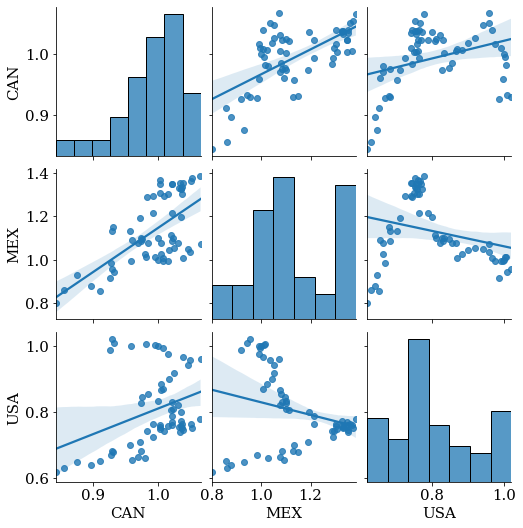

In [17]:
# Criação do Gráfico de dispersão sem agregar pelo TARGET
sns.pairplot(dados,kind="reg")

**Algumas considerações**: 

- Com base nas visualizações apresentadas acima e nos conceitos de estatísticas descritivas, percebe-se que há um forte indicativo de que as séries apresentam comportamentos diferentes. 

- Pode-se obser que enquanto os EUA mostram uma tendência positiva, as outras séries já não mostram essa mesma tendência positiva.

## **Análise de autocorrelação**

- Iremos análisar a autocorelação e a autocorrelação Parcial, para cada um dos paises em análise.

### 1.   **Analisando para os Estados Unidos** (*EUA = USA*)








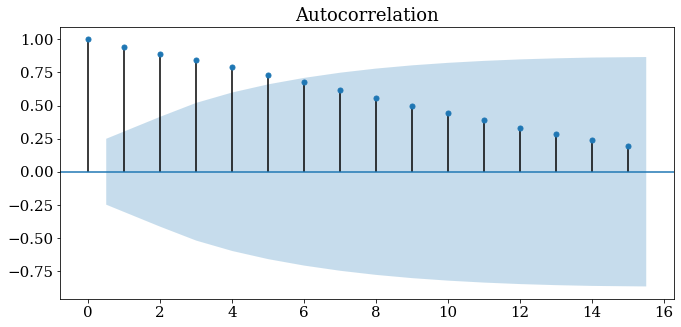

In [18]:
# Autocorrelação
plot_acf(dados.USA, lags=15)
plt.show()

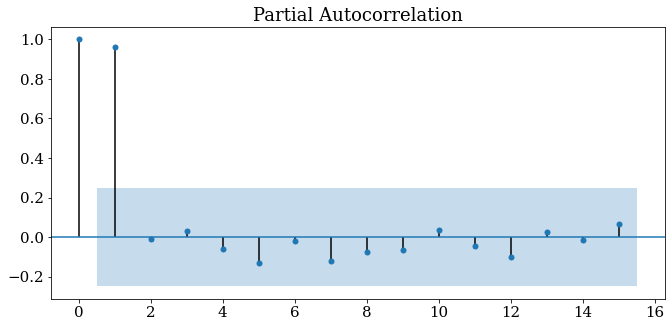

In [19]:
# Autocorrelação Parcial
plot_pacf(dados.USA, lags=15)
plt.show()

### 2.   **Analisando para o Canadá** (*CAN*)

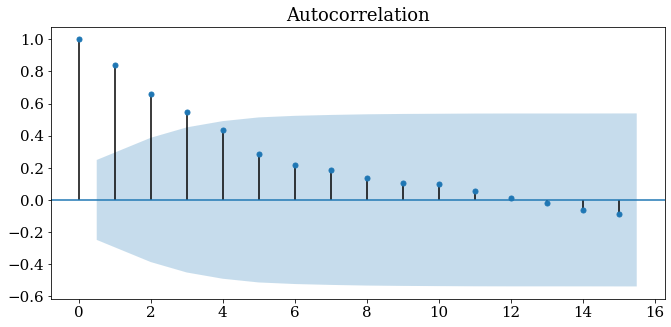

In [20]:
# Usando 15 desfasagens para que possamos ter o comportamento da série temporal
plot_acf(dados.CAN, lags=15)
plt.show()

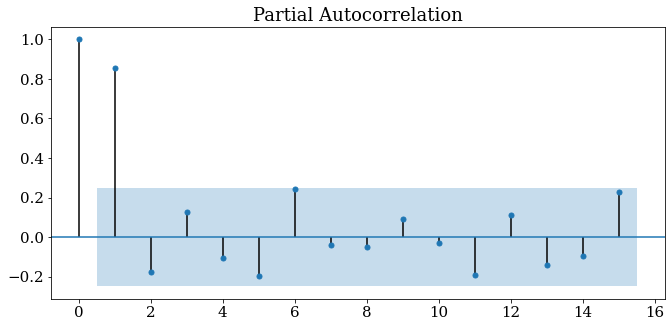

In [21]:
# Verificando a autocorrelação parcial
plot_pacf(dados.CAN, lags=15)
plt.show()

### 3.   **Analisando para o México** (*MEX*)

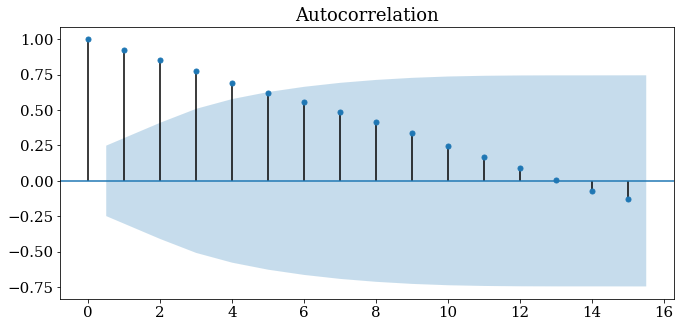

In [22]:
# Autocorrelação Parcial
plot_acf(dados.MEX, lags=15)
plt.show()

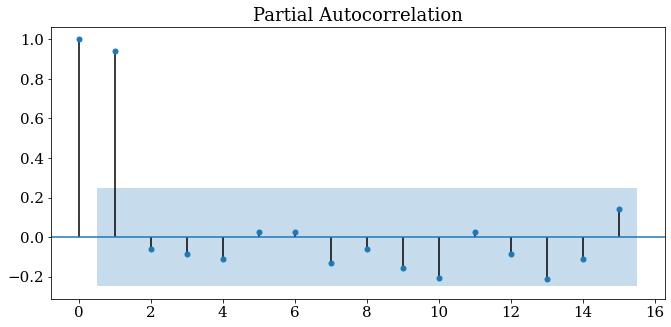

In [23]:
# Autocorrelação
plot_pacf(dados.MEX, lags=15)
plt.show()

**Algumas considerações**:

- As visualizações de autocorrelação, bem como da autocorrelação parcial apresentadas nos gráficos acima, mostram que as séries possuem um processo autorregressivo com uma média móvel, conforme mostrado nas desfagens entre os pontos de cada gráfico.

- Sabe-se que: Os processos auto-regressivos estacionários (AR) têm funções de autocorrelação (ACFS) teóricas que declinam em direção a **zero**, em vez de cortar a zero. 

- Os coeficientes de autocorrelação podem alternar em sinais de frequência, ou mostrar um padrão de onda diferente, mas em todos os casos, eles declinam em direção a zero.



## 5° Pré-Processamento dos Dados





## **Teste de Cointegração**

- **Cointegração** em séries temporais é de suma importância para quem trabalha com séries econômicas, pois possibilitam estudar e analisar relações estruturais entre as séries envolvidas. 

- Mais precisamente, testes de *cointegração* permitem determinar se as séries temporais envolvidas possuem ou não uma relação a longo prazo.

### Utilizaremos o teste de cointegração de *Johnsen* que consite em:

- Se sua hipótese é nula → é que as séries não são cointegradas

- Se sua hipótese não é nula → é que as séries são cointegradas ou alternativa.

 - *No caso da metodologia de Johansen também se torna necessário determinar a ordem da defasagem, pois este procedimento tem como base a hipótese de que ao se introduzir um certo número de defasagem, é possível obter os resíduos bem comportados, isto é, estacionários*.

In [24]:
# Criando a função para realizar a Cointegração

def cointegration_test(dados, det_order=-1, k_ar_diff=5, alpha=0.05): 
  out = coint_johansen(dados, det_order, k_ar_diff)
  d = {'0.90':0, '0.95':1, '0.99':2}
  traces = out.lr1
  cvts = out.cvt[:, d[str(1-alpha)]]
  def adjust(val, length= 6): return str(val).ljust(length)
    
  confianca = 1-alpha

    
  print('Name   ::  Test Stat > C(%s)    =>   Signif  \n' % confianca, '--'*20)
  for col, trace, cvt in zip(dados.columns, traces, cvts):
       print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

In [25]:
# Resultados da Cointegração para alfa=0.05

cointegration_test(dados)

Name   ::  Test Stat > C(0.95)    =>   Signif  
 ----------------------------------------
CAN    ::  18.72     > 24.2761   =>   False
MEX    ::  5.57      > 12.3212   =>   False
USA    ::  1.63      > 4.1296    =>   False


In [26]:
# Resultados da Cointegração para alfa=0.01

cointegration_test(dados, alpha=0.01)

Name   ::  Test Stat > C(0.99)    =>   Signif  
 ----------------------------------------
CAN    ::  18.72     > 29.5147   =>   False
MEX    ::  5.57      > 16.364    =>   False
USA    ::  1.63      > 6.9406    =>   False


**Algumas considerações**: 

- Os resultados indicam a não rejeição da hipótese nula,isto é que não há cointegração, garantindo 1% de significância. Assim, podemos dizer que as séries não são cointegradas.

- Este resultado também reduz o indicativo do uso de modelos VAR.

- Os mdelos de *Vetores Auto-Regressivos* (**VAR**) examinam relações lineares entre cada variável e os valores defasados dela própria e de todas as demais variáveis, impondo como restrições à estrutura da economia somente, isto é:

 - A escolha do conjunto relevante de variáveis e do número máximo de defasagens envolvidas nas relações entre elas.

## **Separando os dados entre Treino e Teste**

- A separação de dados é necessária para ter dados de entrada quando os modelos de previsão são avaliados.

- Os dados de treinamento terão 10 observações.

In [27]:
# Dados de Treino e Teste

x_treino = dados[:-10]
y_test = dados[52:]

In [28]:
# Vesualizando os dados de Treino

x_treino.tail()

isocode,CAN,MEX,USA
year,,,
1997,1.017366,1.044523,0.900190
1998,1.025523,1.051406,0.918917
1999,1.046957,1.050148,0.941375
2000,1.066104,1.072775,0.959432
2001,1.050354,1.036735,0.957825


In [29]:
# Vesualizando os dados de Treino

y_test.tail()

isocode,CAN,MEX,USA
year,,,
2007,0.981433,1.013673,1.006595
2008,0.958357,0.991548,0.998499
2009,0.926482,0.915879,0.986738
2010,0.932567,0.941604,1.009463
2011,0.929405,0.955766,1.020392


## *Realizando o teste de raiz unitária*

- Esse tipo de teste identifica, com base em algum nível de significância, se uma série tem uma raiz unitária ou estacinaridade. 

- Caso haja uma raiz unitária, a série deve ser transformada até que seja estacionária, para depois então ser modelada.

### **Realizando o Teste para os Estados Unidos** (*USA = EUA*)

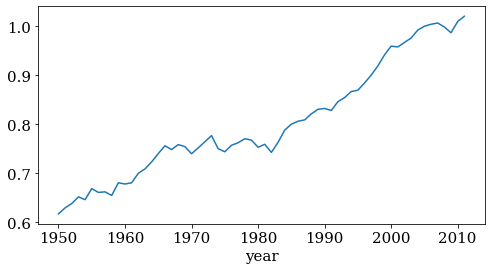

In [30]:
# Plotando os dados
dados.USA.plot(figsize=(8,4))
plt.show()

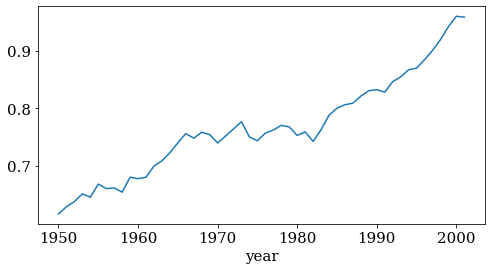

In [31]:
# Verificando os dados de treinos.
x_treino.USA.plot(figsize=(8,4))
plt.show()

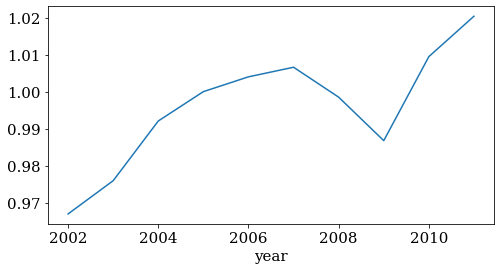

In [32]:
# Verificando os dados de treinos.
y_test.USA.plot(figsize=(8,4))
plt.show()

In [33]:
# Executando o teste de ADF
from statsmodels.tsa.stattools import adfuller
adf = adfuller(dados.USA, maxlag = 1)
adf[0]

0.22364656429890514

In [34]:
# Valores Críticos
adf[4]

{'1%': -3.542412746661615,
 '10%': -2.5927445767266866,
 '5%': -2.910236235808284}

In [35]:
# Executando o teste de ADF
from statsmodels.tsa.stattools import adfuller
adf = adfuller(x_treino.USA, maxlag = 1)
adf[0]

0.549969995234666

In [36]:
# Valores Críticos
adf[4]

{'1%': -3.5656240522121956,
 '10%': -2.598014675124952,
 '5%': -2.920142229157715}

### **Realizando o Teste para o Canadá** (*CAN*)

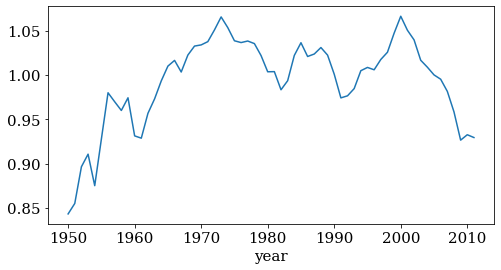

In [37]:
# Plotando os dados
dados.CAN.plot(figsize=(8,4))
plt.show()

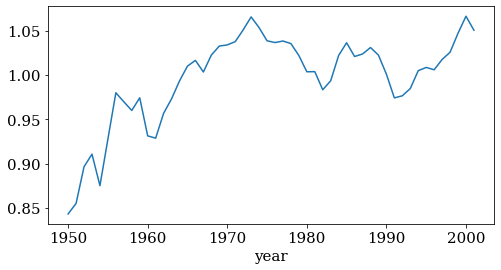

In [38]:
# Verificando os dados de treinos.
x_treino.CAN.plot(figsize=(8,4))
plt.show()

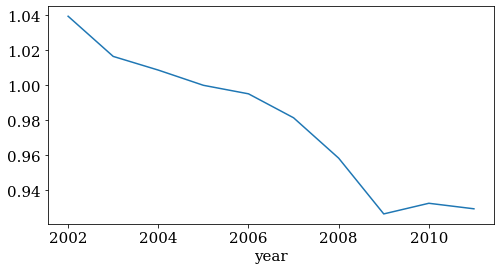

In [39]:
# Verificando os dados de treinos.
y_test.CAN.plot(figsize=(8,4))
plt.show()

In [40]:
# Executando o teste de ADF
from statsmodels.tsa.stattools import adfuller
adf = adfuller(dados.CAN, maxlag = 1)
adf[0]

-3.027753418306733

In [41]:
# Valores Críticos
adf[4]

{'1%': -3.5443688564814813,
 '10%': -2.5931902777777776,
 '5%': -2.9110731481481484}

In [42]:
# Executando o teste de ADF
from statsmodels.tsa.stattools import adfuller
adf = adfuller(x_treino.CAN, maxlag = 1)
adf[0]

-2.9934627887874665

In [43]:
# Valores Críticos
adf[4]

{'1%': -3.5656240522121956,
 '10%': -2.598014675124952,
 '5%': -2.920142229157715}

### **Realizando o Teste para o México** (*MEX*)

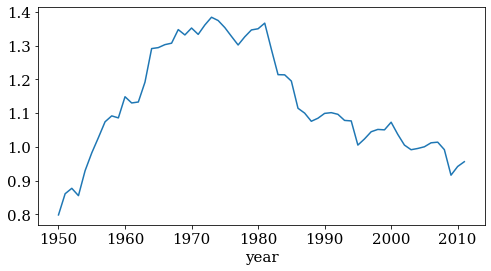

In [44]:
# Plotando os dados
dados.MEX.plot(figsize=(8,4))
plt.show()

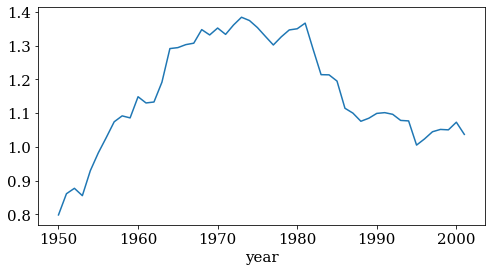

In [45]:
# Verificando para os dados de treinos.
x_treino.MEX.plot(figsize=(8,4))
plt.show()

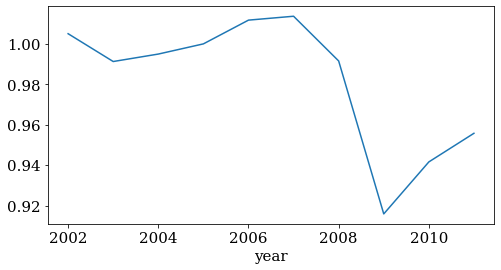

In [46]:
# Verificando para os dados de treinos.
y_test.MEX.plot(figsize=(8,4))
plt.show()

In [47]:
# Executando o teste de ADF
from statsmodels.tsa.stattools import adfuller
adf = adfuller(dados.MEX, maxlag = 1)
adf[0]

-1.4771080324254657

In [48]:
# Valores Críticos
adf[4]

{'1%': -3.5443688564814813,
 '10%': -2.5931902777777776,
 '5%': -2.9110731481481484}

In [49]:
# Executando o teste de ADF
from statsmodels.tsa.stattools import adfuller
adf = adfuller(x_treino.MEX, maxlag = 1)
adf[0]

-1.74917099476679

In [50]:
# Valores Críticos
adf[4]

{'1%': -3.568485864, '10%': -2.5986616, '5%': -2.92135992}

**Algumas considerações**: 

- Os resultados para as séries MEX e USA indicaram a presença de uma raiz unitária, mesmo considerando especificações diferentes.

- Já para a série CAN, houve diferença de resultados entre as especificações, o motivo pode ser que usar apenas a constante para testar esta série, pode ser uma especificação ruim.

### Lembre-se que:

- Hipótese nula: Significa que o processo contém uma raiz unitária.

- Hipótese não nula ou alternativa: Significa que o processo é fracamente estacionário.

Sendo assim, a primeira diferença será aplicada em todas as séries, bem como a verificação. E se após essa transformação as séries se tornaram estacionárias, então não teremos raiz unitária.

## **Verificando a Primeira diferença**

In [51]:
# Verificando a diferença.
dados_dif = dados.diff()[1:]

# Mostrando os nossos dados
dados_dif

isocode,CAN,MEX,USA
year,,,
1951,0.011788,0.062772,0.012441
1952,0.041366,0.016036,0.008863
1953,0.014169,-0.021763,0.013407
1954,-0.035480,0.073963,-0.005679
1955,0.052504,0.052681,0.022593
...,...,...,...
2007,-0.013699,0.001923,0.002595
2008,-0.023076,-0.022125,-0.008096
2009,-0.031875,-0.075669,-0.011761


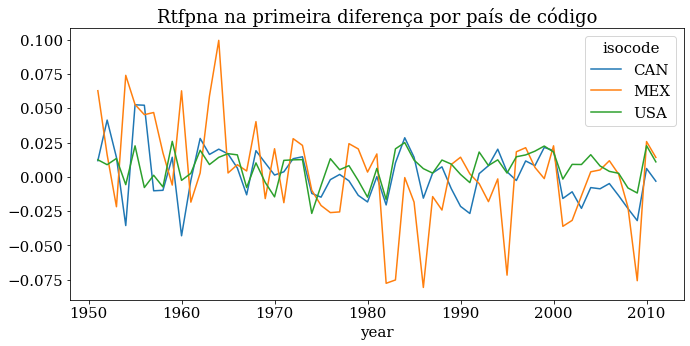

In [52]:
# "Rtfpna": Produtividade Total dos Fatores a Preços Nacionais Constantes

# Gráfico das diferenças por países.

dados_dif.plot()

plt.title('Rtfpna na primeira diferença por país de código')
plt.show()

### **Fazendo uma nova separação dos dados, afim de verificar a estacionaridade.**

In [53]:
# Separando os dados em treino e teste e também pela diferença encontrada.

dados_dif_treino = dados_dif[:-10]
dados_dif_test = dados_dif[51:]

In [54]:
# Verificando os dados de treino
dados_dif_treino.tail()

isocode,CAN,MEX,USA
year,,,
1997,0.011596,0.021249,0.015986
1998,0.008157,0.006883,0.018727
1999,0.021434,-0.001258,0.022458
2000,0.019148,0.022627,0.018057
2001,-0.015750,-0.036040,-0.001606


In [55]:
# Verificando os dados de testes
dados_dif_test.tail()

isocode,CAN,MEX,USA
year,,,
2007,-0.013699,0.001923,0.002595
2008,-0.023076,-0.022125,-0.008096
2009,-0.031875,-0.075669,-0.011761
2010,0.006084,0.025725,0.022725
2011,-0.003161,0.014162,0.010929


### **Realizando o Teste para os Estados Unidos** (*USA = EUA*)

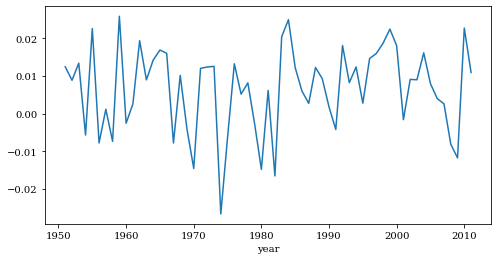

In [56]:
# Plotando os dados
import matplotlib.pyplot as plt
%matplotlib inline
dados_dif.USA.plot(figsize=(8,4))
plt.show()

In [57]:
# Executando o teste de ADF
from statsmodels.tsa.stattools import adfuller
adf = adfuller(dados_dif.USA, maxlag = 1)
adf[0]

-7.3846804871275955

In [58]:
# Valores Críticos
adf[4]

{'1%': -3.5443688564814813,
 '10%': -2.5931902777777776,
 '5%': -2.9110731481481484}

In [59]:
# Executando o teste de ADF
from statsmodels.tsa.stattools import adfuller
adf = adfuller(dados_dif_treino.USA, maxlag = 1)
adf[0]

-6.791252622335738

In [60]:
# Valores Críticos
adf[4]

{'1%': -3.568485864, '10%': -2.5986616, '5%': -2.92135992}

### **Realizando o Teste para o Canadá** (*CAN*)

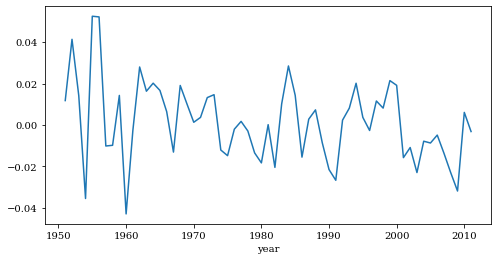

In [61]:
# Plotando os dados
import matplotlib.pyplot as plt
%matplotlib inline
dados_dif.CAN.plot(figsize=(8,4))
plt.show()

In [62]:
# Executando o teste de ADF
from statsmodels.tsa.stattools import adfuller
adf = adfuller(dados_dif.CAN, maxlag = 1)
adf[0]

-6.169567258930633

In [63]:
# Valores Críticos
adf[4]

{'1%': -3.5463945337644063,
 '10%': -2.5936515282964665,
 '5%': -2.911939409384601}

In [64]:
# Executando o teste de ADF
from statsmodels.tsa.stattools import adfuller
adf = adfuller(dados_dif_treino.CAN, maxlag = 1)
adf[0]

-6.450539182404424

In [65]:
# Valores Críticos
adf[4]

{'1%': -3.5714715250448363,
 '10%': -2.5993358475635153,
 '5%': -2.922629480573571}

### **Realizando o Teste para o México** (*MEX*)

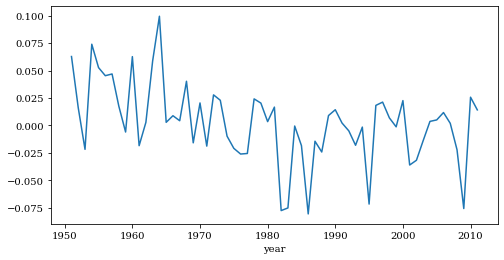

In [66]:
# Plotando os dados
import matplotlib.pyplot as plt
%matplotlib inline
dados_dif.MEX.plot(figsize=(8,4))
plt.show()

In [67]:
# Executando o teste de ADF
from statsmodels.tsa.stattools import adfuller
adf = adfuller(dados_dif.MEX, maxlag = 1)
adf[0]

-5.954754037141676

In [68]:
# Valores Críticos
adf[4]

{'1%': -3.5443688564814813,
 '10%': -2.5931902777777776,
 '5%': -2.9110731481481484}

In [69]:
# Executando o teste de ADF
from statsmodels.tsa.stattools import adfuller
adf = adfuller(dados_dif_treino.MEX, maxlag = 1)
adf[0]

-5.322892223743663

In [70]:
# Valores Críticos
adf[4]

{'1%': -3.568485864, '10%': -2.5986616, '5%': -2.92135992}

**Algumas considerações**:

- Com as séries em diferença, pode-se rejeitar a hipótese da presença de raiz unitária em todas as séries a 1% de significância, aceitando que as séries têm um processo estacionário. Sendo assim, podemos usar esta série para criar o modelo ou seja, podemos modelar a série.


# 6° Construindo a Máquina Preditiva → **Modelagem**

- Iremos utilizar os modelos **ARIMA** e **VAR** e também será feita a modelagem univariada e multivariada de séries temporais.

- A estatística de teste que será usada para selecionar a ordem dos modelos será o AIC.

- O **AIC** é o **Critério de Informação de Akaike**, que é uma métrica, criada por *Hirotugu Akaike*, que mensura a qualidade de um modelo estatístico.

- O **AIC** é fundamentado na teoria da informação. Quando um modelo estatístico é usado para representar um determinado processo, a representação nunca será exata, ou seja, o modelo nunca será perfeito e certamente algumas informações serão perdidas. O *AIC* estima a quantidade relativa de informações perdidas por um determinado modelo: *quanto menos informações um modelo perde*, **maior a qualidade desse modelo e menor a pontuação AIC**.

- Para a nosso estudo sabe-se que os países em análise possuem uma estreita relação econômica e geográfica, por essa razão iremos manter a modelagem com o VAR.

In [ ]:
!pip install pmdarima

In [72]:
import pmdarima as pm

### **Modelo para os Estados Unidos** (*USA = EUA*)

In [73]:
# Modelo para o "USA = EUA"

model_usa = pm.auto_arima(x_treino.USA, start_p=1, start_q=1,
                      test='adf',       
                      max_p=4, max_q=2, 
                      m=1,              
                      d=None,           
                      seasonal=False,   
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-265.971, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-277.589, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-267.956, Time=0.04 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=-279.232, Time=0.08 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=-283.039, Time=0.05 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=-283.465, Time=0.40 sec
 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=-284.787, Time=0.37 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=-288.351, Time=0.29 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-288.660, Time=0.24 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-287.263, Time=0.17 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-290.232, Time=0.39 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-290.811, Time=0.09 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-

In [74]:
# Exibindo alguns Resultados
print(model_usa.summary())

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                   52
Model:               SARIMAX(0, 2, 1)   Log Likelihood                 149.761
Date:                Sun, 20 Dec 2020   AIC                           -295.523
Time:                        16:33:09   BIC                           -291.699
Sample:                             0   HQIC                          -294.066
                                 - 52                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9467      0.080    -11.795      0.000      -1.104      -0.789
sigma2         0.0001   2.94e-05      4.765      0.000    8.24e-05       0.000
Ljung-Box (Q):                       18.70   Jarque-

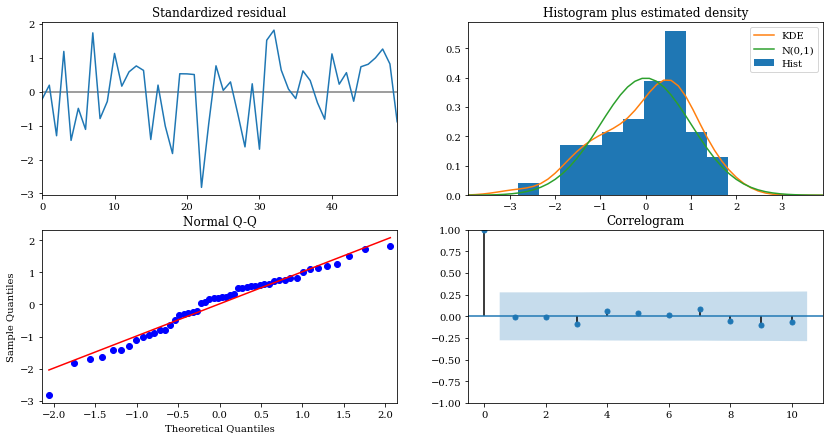

In [75]:
# Plotando os resultados.
model_usa.plot_diagnostics(figsize=(14, 7))
plt.show()

### **Modelo para o Candá** (*CAN*)

In [76]:
# Modelo para o "CANADÁ"

model_can = pm.auto_arima(x_treino.CAN, start_p=1, start_q=1,
                      test='adf',       
                      max_p=4, max_q=2, 
                      m=1,              
                      d=None,           
                      seasonal=False,   
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-254.510, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-253.469, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-255.845, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-254.278, Time=0.02 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-258.850, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-256.851, Time=0.28 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-258.558, Time=0.06 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0] intercept
Total fit time: 0.845 seconds


In [77]:
# Exibindo alguns Resultados
print(model_can.summary())

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                   52
Model:               SARIMAX(0, 1, 2)   Log Likelihood                 133.425
Date:                Sun, 20 Dec 2020   AIC                           -258.850
Time:                        16:33:11   BIC                           -251.122
Sample:                             0   HQIC                          -255.897
                                 - 52                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0039      0.003      1.547      0.122      -0.001       0.009
ma.L1          0.2745      0.148      1.852      0.064      -0.016       0.565
ma.L2         -0.2952      0.201     -1.467      0.1

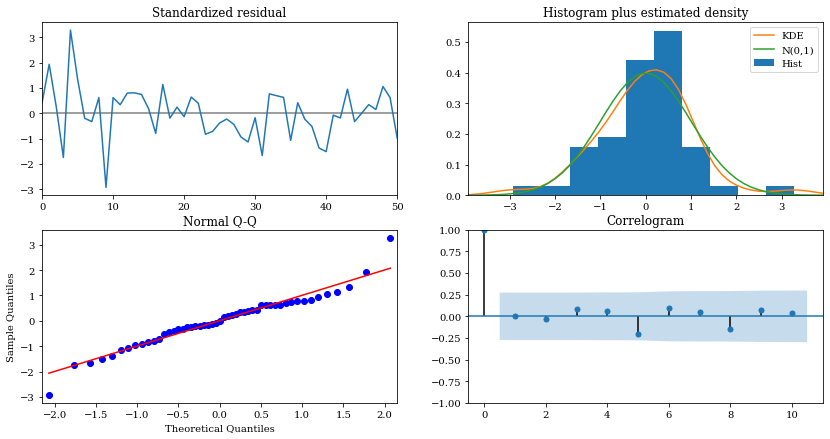

In [78]:
# Plotando os resultados.
model_can.plot_diagnostics(figsize=(14, 7))
plt.show()

### **Modelo para o México** (*MEX*)

In [79]:
# Modelo para o "CANADÁ"

model_mex = pm.auto_arima(x_treino.MEX, start_p=1, start_q=1,
                      test='adf',       
                      max_p=4, max_q=2, 
                      m=1,              
                      d=None,           
                      seasonal=False,   
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-166.738, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-172.482, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-168.637, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=-178.069, Time=0.15 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=-179.716, Time=0.20 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=-177.880, Time=0.27 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=-184.011, Time=0.31 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-186.310, Time=0.25 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-185.395, Time=0.20 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=-182.807, Time=0.33 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=-186.574, Time=0.12 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-187.4

In [80]:
# Exibindo alguns Resultados
print(model_mex.summary())

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                   52
Model:               SARIMAX(0, 2, 1)   Log Likelihood                  96.641
Date:                Sun, 20 Dec 2020   AIC                           -189.282
Time:                        16:33:15   BIC                           -185.458
Sample:                             0   HQIC                          -187.825
                                 - 52                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8340      0.099     -8.456      0.000      -1.027      -0.641
sigma2         0.0012      0.000      4.210      0.000       0.001       0.002
Ljung-Box (Q):                       43.01   Jarque-

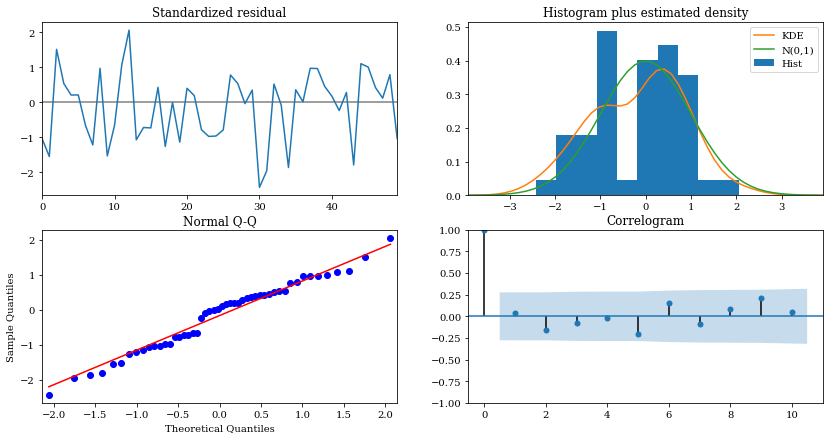

In [81]:
# Plotando os resultados.
model_mex.plot_diagnostics(figsize=(14, 7))
plt.show()

**Algumas considerações**: 

- Este modelo é considerado com um passeio aleatório, isto é, as variações são exclusivamente estocásticas.

## **Modelagem multivariada**

### Mas o que é Análise Multivariada? 

- A análise multivariada consiste em um conjunto de métodos estatísticos utilizados em situações em que várias variáveis são medidas simultaneamente em cada elemento amostral.

- Na maioria das vezes, as variáveis são correlacionadas entre si e quanto maior o número de variáveis, mais complexa torna-se a análise por métodos comuns.

- Em geral, os métodos de análise multivariada são utilizados com o propósito de simplificar ou facilitar a interpretação do fenômeno que está sendo estudado.

- Basicamente, a análise multivariada se divide em dois grupos: um primeiro consistindo em técnicas exploratórias de simplificação da estrutura de variabilidade dos dados, em uma tentativa de sintetizar as variáveis, e um segundo, consistindo em técnicas de inferência.



## Lembre-se que: 

- **A modelagem** de equações estruturais, denominada SEM (do inglês *Structural Equation Modeling*), é um método de análise **multivariada** que combina aspectos de regressão múltipla e de análise fatorial, com o objetivo de estimar simultaneamente uma série de relações de dependência.

Modelo VAR

In [82]:
# Treinando o Modelo "VAR"

var_model = VAR(dados_dif_treino)

var_model_best = var_model.fit(ic = 'aic', verbose=True)
var_model_best.summary()

<statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 10, BIC -> 0, FPE -> 0, HQIC -> 0>
Using 10 based on aic criterion


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 20, Dec, 2020
Time:                     16:33:15
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -21.3956
Nobs:                     41.0000    HQIC:                  -23.8671
Log likelihood:           436.761    FPE:                4.18544e-11
AIC:                     -25.2825    Det(Omega_mle):     7.72849e-12
--------------------------------------------------------------------
Results for equation CAN
             coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------
const          -0.013904         0.007936           -1.752           0.080
L1.CAN          0.017621         0.368263            0.048           0.962
L1.MEX         -0.110925         0.105811           -1.048           0.294
L1.USA     

In [83]:
# Treinando o modelo
# O "lag" está indica a ordem de atraso no processamento
lag_order = 10

model_fitted = var_model.fit(lag_order) 
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 20, Dec, 2020
Time:                     16:33:16
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -21.3956
Nobs:                     41.0000    HQIC:                  -23.8671
Log likelihood:           436.761    FPE:                4.18544e-11
AIC:                     -25.2825    Det(Omega_mle):     7.72849e-12
--------------------------------------------------------------------
Results for equation CAN
             coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------
const          -0.013904         0.007936           -1.752           0.080
L1.CAN          0.017621         0.368263            0.048           0.962
L1.MEX         -0.110925         0.105811           -1.048           0.294
L1.USA     

## **Vamos realizar o teste para detectar a autocorrelação** → *Teste Durbin Watson*

- Esse teste é utilizado para detectar a presença de autocorrelação (dependência) nos resíduos de uma análise de regressão. Este teste é baseado na suposição de que os erros no modelo de regressão são gerados por um processo autoregressivo de primeira ordem

In [84]:
# Aplicando o teste, tem-se:

def adjust(value, length= 6): return str(value).ljust(length)
resid_out = durbin_watson(model_fitted.resid)

for col, value in zip(dados_dif.columns, resid_out):
    print(adjust(col), ':', value)

CAN    : 2.1300915461408567
MEX    : 1.6583138025923696
USA    : 1.8547092949411006


**Algumas considerações**: 

- Os resultados do teste variam de 0 a 4. Quanto mais próximo de 0 ou 4, maior o indicador de **correlação residual**. *Quanto mais próximo de 2, maior o indicativo de não correlação dos resíduos*.

- Caso os resultados do teste sejam próximos de 2, temos um indício de **não correlação dos resíduos**. Sendo assim, podemos manter o modelo VAR estimado.

## **Prevendo 10 anos à série temporal**

- Entenda que essa é uma previsão que se encontra fora da amostra

- Então é preciso definir um horizonte de previsão e um índice para visualização. Ou seja, o periodo que queremos prever a visualização.

In [85]:
# O "n" representa o indice de visualização. Ou seja, queremos fazer previsões daqui a 10 anos.
n = 10

index_of_all = dados.index
index_of_fc = y_test.index

### **Prevendo para os Estados Unidos** (*USA = EUA*)

In [86]:
# Prevendo como o Modelo - ARIMA

# Analizando a Previsão e  também o intervalo de confiança
fc_arima_usa, confint_arima_usa = model_usa.predict(n=n, return_conf_int=True)  

# Organizando os parâmetros para visualização
fc_arima_usa = pd.Series(fc_arima_usa, index=index_of_fc)
lower_series_usa = pd.Series(confint_arima_usa[:, 0], index=index_of_fc)
upper_series_usa = pd.Series(confint_arima_usa[:, 1], index=index_of_fc)


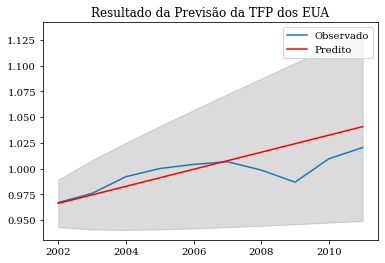

In [87]:
# Plotando o gráfico
plt.plot(y_test.USA)
plt.plot(fc_arima_usa, color='red')
plt.legend(['Observado','Predito'])
plt.fill_between(lower_series_usa.index, 
                 lower_series_usa, 
                 upper_series_usa, 
                 color='k', alpha=.14)

plt.title("Resultado da Previsão da TFP dos EUA")
plt.show()

### **Prevendo para o Candá** (*CAN*)

In [88]:
# Analizando a Previsão e  também o intervalo de confiança
fc_arima_can, confint_arima_can = model_can.predict(n=n, return_conf_int=True)

# Organizando os parâmetros para visualização
fc_arima_can = pd.Series(fc_arima_can, index=index_of_fc)
lower_series_can = pd.Series(confint_arima_can[:, 0], index=index_of_fc)
upper_series_can = pd.Series(confint_arima_can[:, 1], index=index_of_fc)


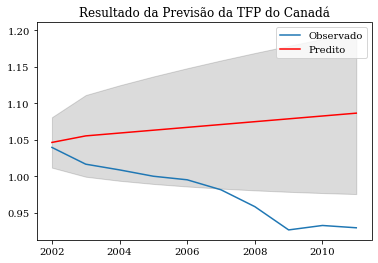

In [89]:
# Plotando o gráfico
plt.plot(y_test.CAN)
plt.plot(fc_arima_can, color='red')
plt.legend(['Observado','Predito'])
plt.fill_between(lower_series_can.index, 
                 lower_series_can, 
                 upper_series_can, 
                 color='k', alpha=.14)

plt.title("Resultado da Previsão da TFP do Canadá")
plt.show()

### **Prevendo para o México** (*MEX*)

In [90]:
# Analizando a Previsão e  também o intervalo de confiança
fc_arima_mex, confint_arima_mex = model_mex.predict(n=n, return_conf_int=True) 

# Organizando os parâmetros para visualização
fc_arima_mex = pd.Series(fc_arima_mex, index=index_of_fc)
lower_series_mex = pd.Series(confint_arima_mex[:, 0], index=index_of_fc)
upper_series_mex = pd.Series(confint_arima_mex[:, 1], index=index_of_fc)


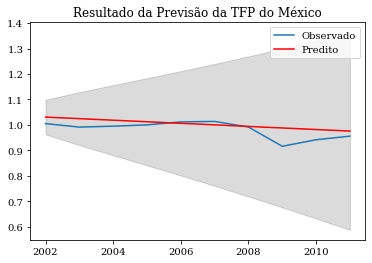

In [91]:
# Plotando o gráfico

plt.plot(y_test.MEX)
plt.plot(fc_arima_mex, color='red')
plt.legend(['Observado','Predito'])
plt.fill_between(lower_series_mex.index, 
                 lower_series_mex, 
                 upper_series_mex, 
                 color='k', alpha=.14)

plt.title("Resultado da Previsão da TFP do México")
plt.show()


**Algumas considerações**: 

- De acordo com os resultados apresentados sobre as previsões, apenas a do modelo do **Canada** foi observado um valor verdadeiro fora do intervalo de confiança.

- Agora já o modelo do **México** conseguiu acompanhar bem os dados reais, e essa mesma situação também foi observada para os **Estados Unidos**.

## **Aplicando o modelo VAR**

Mas para isso precisamos:

- Reverter os dados que estão em primeira diferença para o seu
nível original, para que seja possível fazer uma comparação com o modelo univariada.
    
- Ou seja, será usado um rearranjo da equação da primeira diferença, a fim de recuperar a série em nível.

### 1.   Prevendo para o **CANADÁ** (*CAN*)




In [92]:
# Prevendo com o modelo "VAR"

fc_var = model_fitted.forecast(y=dados_dif_treino[-lag_order:].values, steps=10)
df_fc_var = pd.DataFrame(fc_var, index=dados_dif.index[-10:], columns=dados_dif.columns)
df_fc_var

isocode,CAN,MEX,USA
year,,,
2002,0.012393,0.024261,0.018478
2003,-0.010311,-0.001948,-0.007622
2004,0.004292,0.009124,0.017540
2005,0.011637,0.006889,0.022633
2006,0.027096,0.063257,0.010985
2007,0.015113,0.013574,0.011781
2008,-0.010524,-0.006220,-0.016551
2009,0.003552,-0.022945,0.010721
2010,-0.000423,-0.040224,-0.000182


In [93]:


def reverse_difference_forecast(forecast, x_treino): 
    for column in x_treino.columns:
        forecast[column].iloc[0] = forecast[column].iloc[0] + x_treino[column].iloc[-1]
    
    for index in range(1, 10):
        for column in x_treino.columns:
            forecast[column].iloc[index] = forecast[column].iloc[index] + forecast[column].iloc[index-1]
      
    return forecast

In [94]:
# Revertendo os dados para a sua forma original

fc_var = reverse_difference_forecast(df_fc_var, x_treino)
fc_var

isocode,CAN,MEX,USA
year,,,
2002,1.062747,1.060996,0.976304
2003,1.052436,1.059049,0.968682
2004,1.056727,1.068173,0.986222
2005,1.068364,1.075062,1.008855
2006,1.095461,1.138319,1.019840
2007,1.110573,1.151892,1.031621
2008,1.100049,1.145672,1.015070
2009,1.103601,1.122727,1.025791
2010,1.103178,1.082503,1.025609


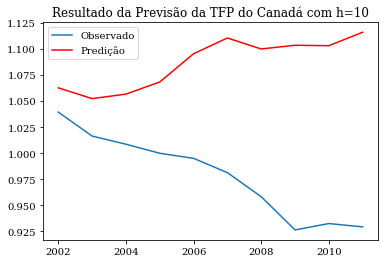

In [95]:
# Exibindo em um gráfico os resultados
plt.plot(y_test.CAN)
plt.plot(fc_var['CAN'], color='red')
plt.legend(['Observado','Predição'])

plt.title("Resultado da Previsão da TFP do Canadá com h=10")
plt.show()

2.   Prevendo para o **MÉXICO** (*MEX*)

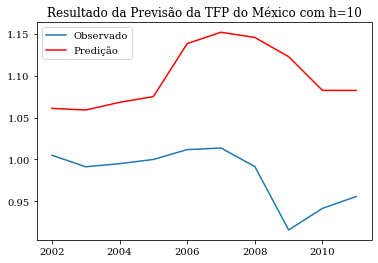

In [96]:
# Exibindo em um gráfico os resultados
plt.plot(y_test.MEX)
plt.plot(fc_var['MEX'], color='red')
plt.legend(['Observado','Predição'])

plt.title("Resultado da Previsão da TFP do México com h=10")
plt.show()

1.   Prevendo para os **ESTADOS UNIDOS DA AMERICA** (*USA = EUA*)

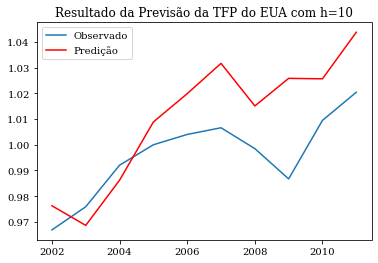

In [97]:
# Exibindo em um gráfico os resultados
plt.plot(y_test.USA)
plt.plot(fc_var['USA'], color='red')
plt.legend(['Observado','Predição'])

plt.title("Resultado da Previsão da TFP do EUA com h=10")
plt.show()

## *Verificando os Resíduos*

- Os gráficos de função de autocorrelação (ACF) de resíduos incluem linhas que representam os limites de significância. 

Figure(720x720)


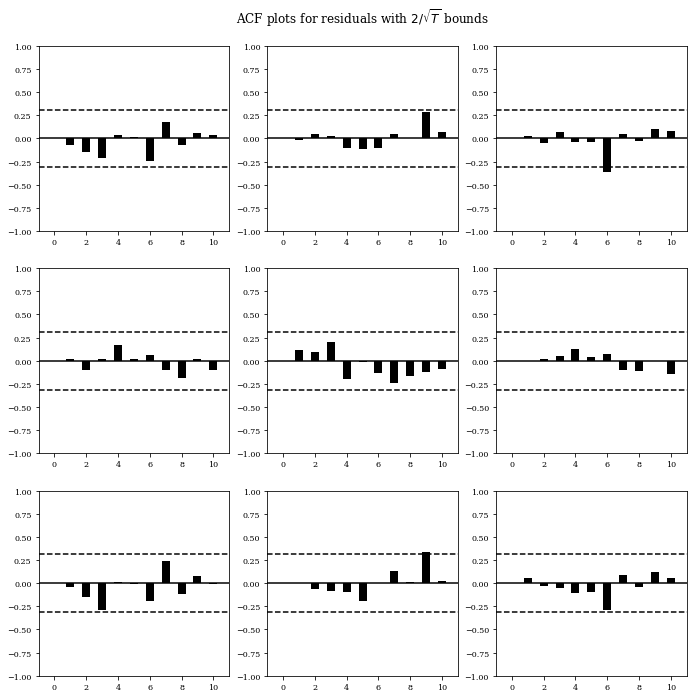

In [98]:
# Gráfico ACF para resíduos

print(model_fitted.plot_acorr())

**Algumas considerações**: 

### De acordo com os resultados é possível observar que:

- As previsões para o MEX e os EUA se comportaram de forma semelhante aos dados reais, mas em um nível diferente. Já com as previsões para o CAN, apresentam algumas diferença.

- Porém, os resíduos VAR não indicam a presença de autocorrelação significativa.

##7° Avaliando a precisão da Máquina Preditiva (*Modelo*)

## **Analisando a acurácia** → *Precisão da previsão*

As estatísticas MAPE, MAD e MSD são informações importantes para comparmos os modelos de suavização e decidirmos se estes representam um bom ajuste aos nossos dados. 

 - A **Média Percentual Absoluta do Erro** (*MAPE - Mean Absolute Percentage Erro*) → Expressa a acurácia do erro em percentagem. Por exemplo, se temos um MAPE de 7%, quer dizer que o nosso ajuste esta errado em 7% dos dados. 

 - O **Desvio Padrão Absoluto da Média** (*MAD - Mean Absolute Deviation*) → Representa o desvio padrão do ajuste em relação à média nas mesmas unidades dos dados. Por exemplo, se estamos ajustando uma série temporal de visitas durante o tempo e encontramos um MAD de 72, quer dizer que o nosso ajuste possui um desvio padrão da média de 72 dias.

 - O **Desvio Padrão Quadrático da Média** (*MSD - Mean Squared Deviation*) → Esta medida de acurácia é bastante comum em ajustes de séries temporais. Quando temos outliers em nosso conjunto de dados, essa medida é mais afetada do que o MAD. Portanto se temos um MAD baixo e um MSD alto podemos imaginar que temos outliers em nosso conjunto de dados.

- **Para o nosso caso, serão utilizadas as métricas do MSPE e MAPE para avaliar e analisar as previsões dos modelos**.


In [99]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [100]:
def forecast_accuracy(dados_pred, dados_observados, column_names):
        
    result = pd.DataFrame(index=['MSPE','MAPE'], columns=column_names)
    
    result_col = 0
    for column in dados_observados.columns:
        mspe = mean_squared_error(dados_observados[column], dados_pred[column])
        mape = mean_absolute_error(dados_observados[column], dados_pred[column])
        
        result.iloc[0, result_col] = mspe
        result.iloc[1, result_col] = mape
        
        result_col += 1
        
    return result

In [101]:
# Organizando os dados para fazer a previsão

fc_arima = pd.DataFrame()

fc_arima['CAN'] = fc_arima_can
fc_arima['MEX'] = fc_arima_mex
fc_arima['USA'] = fc_arima_usa
fc_arima

,CAN,MEX,USA
year,,,
2002,1.046314,1.030627,0.966113
2003,1.055269,1.024518,0.974401
2004,1.059162,1.018410,0.982689
2005,1.063054,1.012302,0.990977
2006,1.066946,1.006193,0.999265
2007,1.070838,1.000085,1.007553
2008,1.074730,0.993976,1.015841
2009,1.078622,0.987868,1.024129
2010,1.082514,0.981759,1.032417


In [102]:
# Avaliando a Precisão da previsão com o modelo - ARIMA

fc_acc_arima = forecast_accuracy(fc_arima, y_test, ['CAN_ARIMA','MEX_ARIMA','USA_ARIMA'])
fc_acc_arima

,CAN_ARIMA,MEX_ARIMA,USA_ARIMA
MSPE,0.0105045,0.000987324,0.000283375
MAPE,0.0895796,0.0248194,0.0124396


In [103]:
# Avaliando a Precisão da previsão com o modelo - VAR
fc_acc_var = forecast_accuracy(fc_var, y_test, ['CAN_VAR','MEX_VAR','USA_VAR'])
fc_acc_var

,CAN_VAR,MEX_VAR,USA_VAR
MSPE,0.0150959,0.0156274,0.000373391
MAPE,0.108116,0.116531,0.0167253


**Algumas considerações**: 

- Os modelos univariados obtiveram menos erros em relação aos multivariados, ou seja, os modelos ARIMA foram mais precisos.

- Para dizer que as previsões foram estatisticamente melhores, seria necessário testar, por meio do teste Diebold-Mariano (sendo este o indicado para o caso específico).

- Analisando outros parâmetros e variáveis, seria interessante adicionar covariáveis relacionadas ao produto, capital humano e estoque de capital, que estão estritamente relacionadas à TFP, desde a construção deste variável, para que se possa obter mais resultados e compara-los com outros modelo. 

In [104]:
# Ciência de Dados é Vida 
%%html
<marquee style='width: 60%; color: DarkRed;'><b>Muito Obrigado!</b></marquee>